In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
ride_data_complete = pd.merge(ride_data, city_data, how="left", on=["city", "city"])

# Display the data table for preview
ride_data_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
ride_data_complete["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [3]:
#Data Frame by Type
urban_rides = ride_data_complete[ride_data_complete["type"] == "Urban"]
suburban_rides = ride_data_complete[ride_data_complete["type"] == "Suburban"]
rural_rides = ride_data_complete[ride_data_complete["type"] == "Rural"]



In [4]:
#Ride count, avg fare & driver count
urban_count = urban_rides.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_rides.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_rides.groupby(["city"]).mean()["driver_count"]

suburban_count = suburban_rides.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_rides.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_rides.groupby(["city"]).mean()["driver_count"]

rural_count = rural_rides.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_rides.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_rides.groupby(["city"]).mean()["driver_count"]


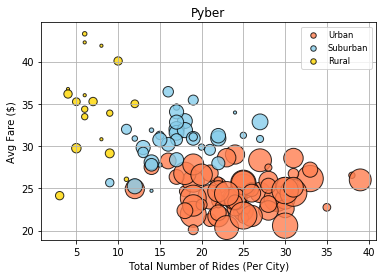

In [11]:
#plotting

plt.scatter(urban_count, urban_avg_fare, marker="o", c="coral", s=10*urban_driver_count, alpha=.8, label="Urban", edgecolor="black")
plt.scatter(suburban_count, suburban_avg_fare, marker="o", c="skyblue", s=10*suburban_driver_count, alpha=.8, label="Suburban", edgecolor="black")
plt.scatter(rural_count, rural_avg_fare, marker="o", c="gold", s=10*rural_driver_count, alpha=.8, label="Rural", edgecolor="black")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Avg Fare ($)")
plt.title("Pyber")
plt.grid(True)
legend = plt.legend(fontsize="small")
legend.legendHandles[0]._sizes=[30]
legend.legendHandles[1]._sizes=[30]
legend.legendHandles[2]._sizes=[30]

## Total Fares by City Type

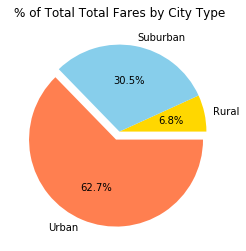

In [6]:
#Calculate Type Percents
fare = 100 * ride_data_complete.groupby(["type"]).sum()["fare"] / ride_data_complete["fare"].sum()
fare

#Build Pie Chart
plt.pie(fare, labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], explode=[0, 0, 0.1], autopct="%1.1f%%")
plt.title("% of Total Total Fares by City Type")
plt.show()


## Total Rides by City Type

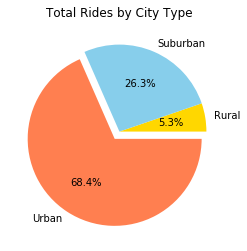

In [7]:
# Calculate Ride Percents
rides = 100 * ride_data_complete.groupby(["type"]).count()["ride_id"] / ride_data_complete["ride_id"].count()
rides

# Build Pie Chart
plt.pie(rides, labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], explode=[0, 0, 0.1], autopct="%1.1f%%")
plt.title("Total Rides by City Type")


# Save Figure
plt.savefig("images/rides_city_type.png")

plt.show()

## Total Drivers by City Type

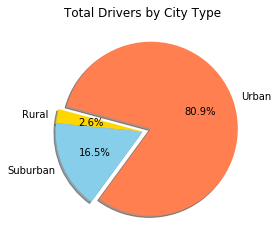

In [8]:
# Calculate Driver Percents
driver = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()
driver

# Build Pie Charts
plt.pie(driver, labels=["Rural", "Suburban", "Urban"], colors=["gold", "skyblue", "coral"], explode=[0, 0, 0.1], autopct="%1.1f%%",
       startangle=165, shadow=True)
plt.title("Total Drivers by City Type")


# Save Figure
plt.savefig("images/drivers_city_type.png")

plt.show()

